# Pandas visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
# To see the styles available

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## DataFrampe.plot

The built-in visualization of pandas really shines in helping with fast and easy plotting of series and DataFrames that can help us explore the data.

In [8]:
# We choose the style that we want for the graphs
plt.style.use('seaborn-colorblind')

In [9]:
# Let's make a DataFrame
# 1) We'll set the seed for the random number generator, which will allow us to reproduce
# the data
np.random.seed(123)

# Let's add three column of random time series data
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),     #cumsum cumulatives sums an array
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20},
                  index = pd.date_range('1/1/2017', periods = 365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


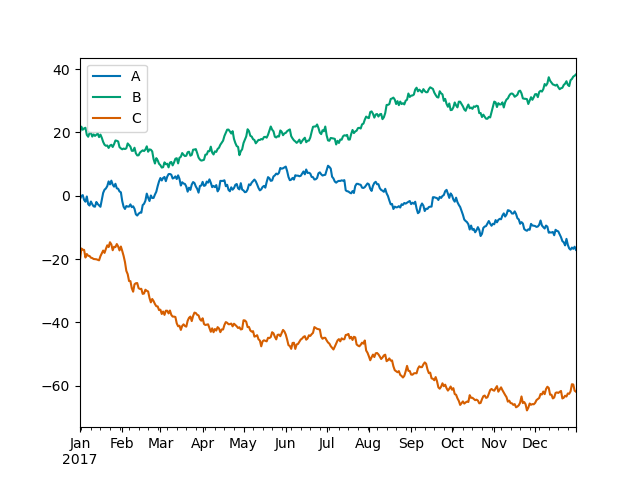

<AxesSubplot:>

In [10]:
df.plot()

In [11]:
# The plot method on series and DataFame is just a simple wrapper around plt.plot

<IPython.core.display.Javascript object>


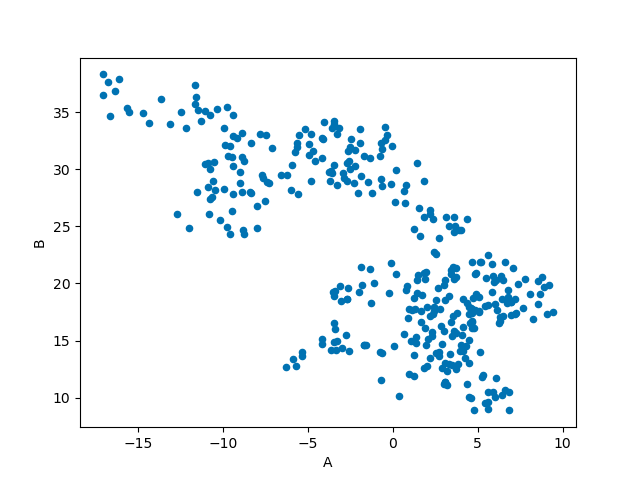

<AxesSubplot:xlabel='A', ylabel='B'>

In [13]:
# With the 'kind' parameter we can select the kind of plot we want to use
df.plot('A', 'B', kind = 'scatter')

<IPython.core.display.Javascript object>


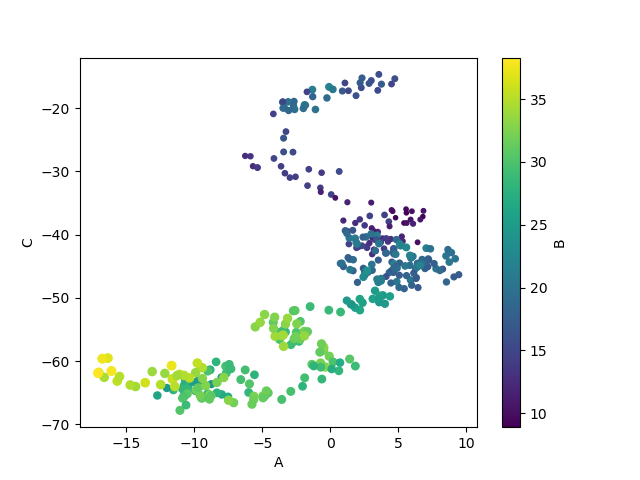

<AxesSubplot:xlabel='A', ylabel='C'>

In [15]:
# Another way to the same, but more sophisticated is:

# We set A and C columns against one another with the size and color changing based on the
# values of the B column
# c --> color
# s --> size

df.plot.scatter('A', 'C', c = 'B', s = df['B'], colormap = 'viridis')

<IPython.core.display.Javascript object>


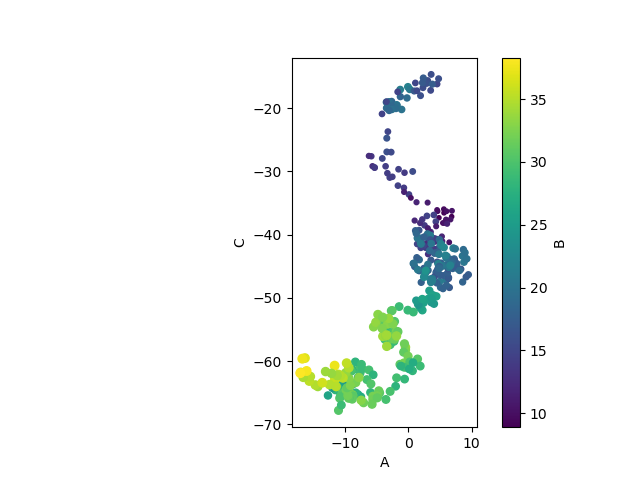

In [17]:
# Because df.plot.scatter returns a matplotlib.axes._subplot, we can perform modifications
# on this object just like objects returned by matplotlib plots
ax = df.plot.scatter('A', 'C', c = 'B', s = df['B'], colormap = 'viridis')

# For instance, we can change the aspect ratio of the AxesSubplot to equal
ax.set_aspect('equal')

In [18]:
# Setting the aspect ratio to equal allows the viewer to easily see that the range of series
# A is much smaller than series C

<IPython.core.display.Javascript object>


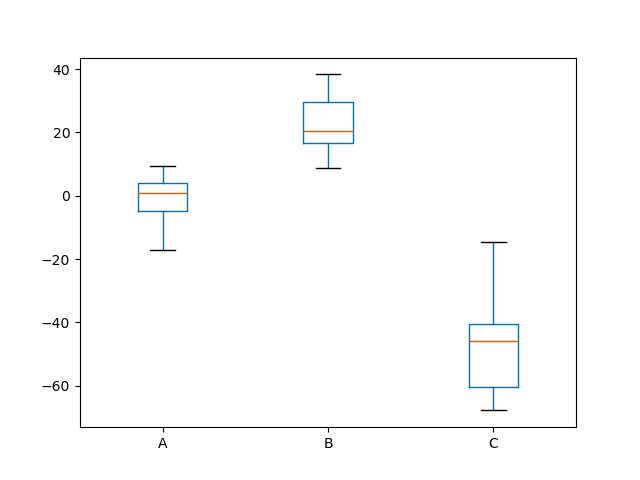

<AxesSubplot:>

In [19]:
# We can also do other plots
df.plot.box()

<IPython.core.display.Javascript object>


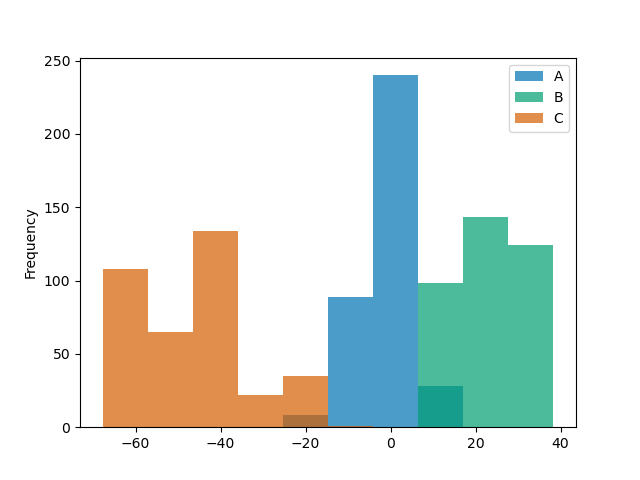

<AxesSubplot:ylabel='Frequency'>

In [20]:
df.plot.hist(alpha = 0.7)

<IPython.core.display.Javascript object>


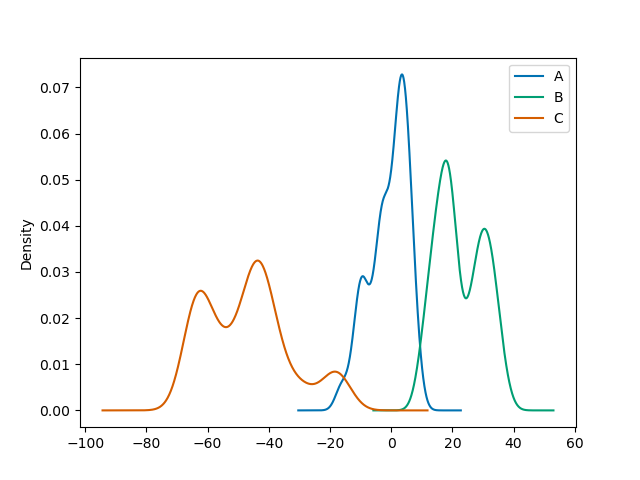

<AxesSubplot:ylabel='Density'>

In [21]:
# We can also plot 'kernel sendity estimate plots'
df.plot.kde()

In [22]:
# Kernel density estimation plots come in handy in data science application where we want
# to derive a smooth continuous function from a given sample

## pandas.tools.plotting

In [23]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Scatter matrix

# It's a way of comparing each column in a DataFrame to every other column in a pairwise
# fashion.

# The scatter matrix creates scatter plots between the different variabels and histograms
# along the diagonals

# It allows us to quickly see some of the more obvious patterns in the data set

<IPython.core.display.Javascript object>


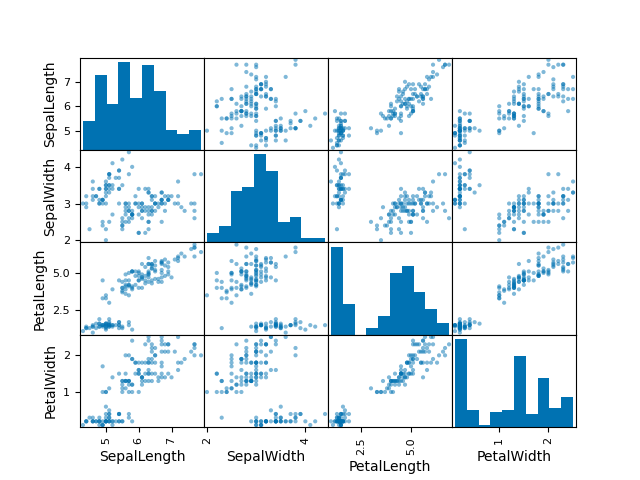

In [30]:
from pandas.plotting import scatter_matrix, parallel_coordinates

scatter_matrix(iris);

<IPython.core.display.Javascript object>


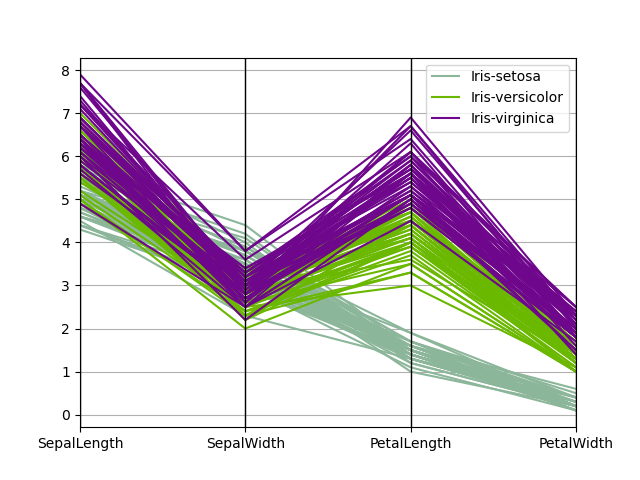

<AxesSubplot:>

In [31]:
# Another plotting tool for creating parallel coordinates plots

plt.figure()
parallel_coordinates(iris, 'Name')

In [32]:
# Each variable in the data set coresponds to an equally spaced parallel vertical line.
# The values of each variable are then connected by lines between for each individual
# observation

In [33]:
# In our example, we can see that the petal length and petal width are two variables that
# split the different species fairly crealy.

# With iris virginica having the longest and widest petals

# Seaborn

A Python visualization library based on matplotlib.

It's really just a wraparound matplotlib. It adds styles to make default data visualizations much more visually appealing and makes creation of specific types of complicated plots much simpler

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [53]:
np.random.seed(1234)

# np.random.normal(mean, std, observations)
v1 = pd.Series(np.random.normal(0, 10, 1000), name = 'v1')
v2 = pd.Series(2 * v1 + np.random.normal(60, 15, 1000), name = 'v2')

<IPython.core.display.Javascript object>


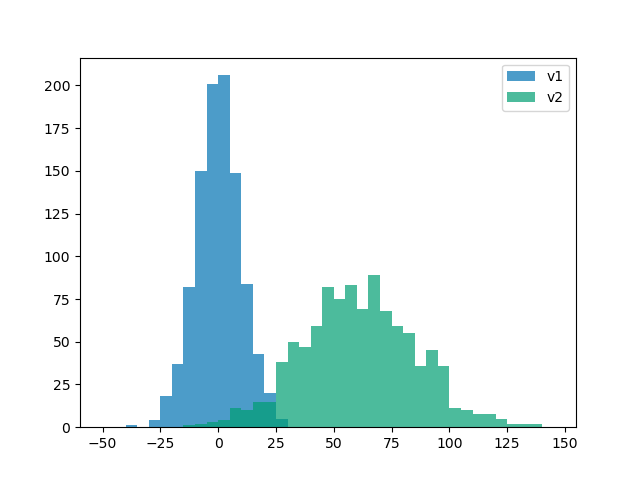

In [38]:
plt.figure()

# For the bin parameter, we can pass in a specific sequence using bp.arange to specify the
# number of bins we want to use
plt.hist(v1, alpha = 0.7, bins = np.arange(-50, 150, 5), label = 'v1')
plt.hist(v2, alpha = 0.7, bins = np.arange(-50, 150, 5), label = 'v2')
plt.legend()

In [39]:
# v1 has a lower mean than v2
# v2 has a higher spread than v1

<IPython.core.display.Javascript object>


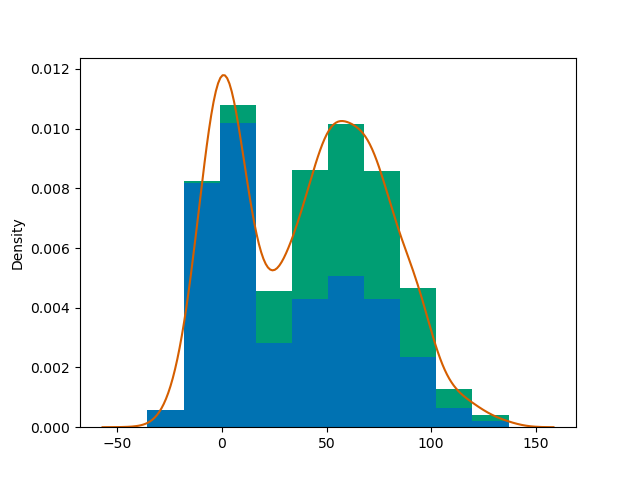

<AxesSubplot:ylabel='Density'>

In [44]:
# Let's visualize these histograms again but in a different way
plt.figure()

# Let's pass v1 and v2 in a list
# Setting normed = True will normalize the histogram to form a probability density
plt.hist([v1, v2], histtype = 'barstacked', density = True)

v3 = np.concatenate((v1, v2))
sns.kdeplot(v3)

In [45]:
# The kernel density estimation plot estimates the probability density function of the
# variables v3. Plotting it on top of the stacked histograms of v1 and v2 allows us to see
# the relationship between these two visualizations

In [49]:
# Seaborn provides a convenient function for these type of plots -> sns.displot
plt.figure()
sns.displot(v3, hist_kws = {'color': 'Teal'}, kde_kws = {'color': 'Navy'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'Rectangle' object has no property 'hist_kws'

<IPython.core.display.Javascript object>


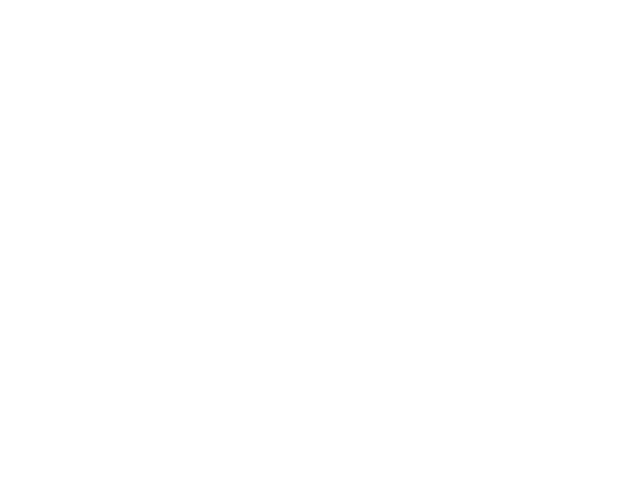

<IPython.core.display.Javascript object>


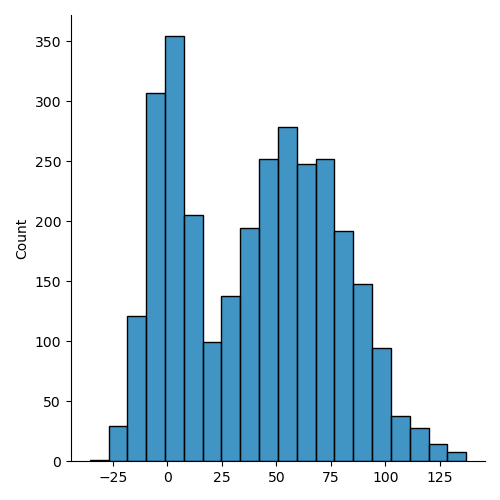

In [56]:
# No sé porque el hist_kws me da error, así que lo ejecuto sin esa parte

plt.figure()
sns.displot(v3, kde_kws = {'color': 'Navy'})

<IPython.core.display.Javascript object>


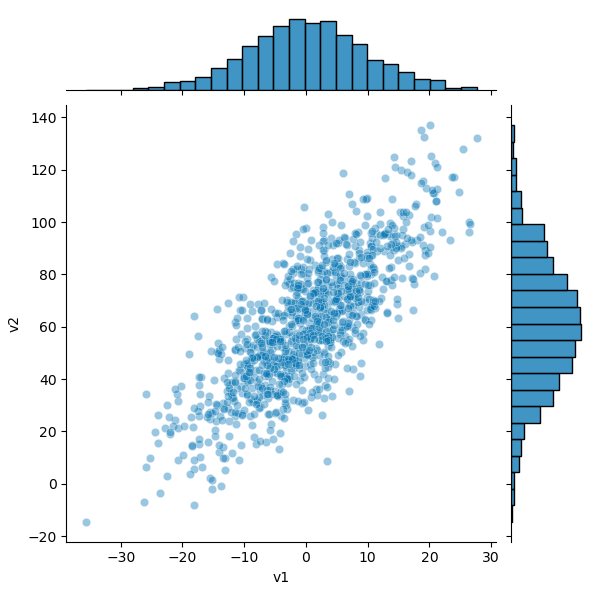

In [54]:
# Another plot
sns.jointplot(v1, v2, alpha = 0.4)

In [57]:
# The jointplot allows us to visualize the distribution of the two variables individually.
# As well as the relationships between the variables.

# In our example, v1 and v2 appeared to be normally distributed

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


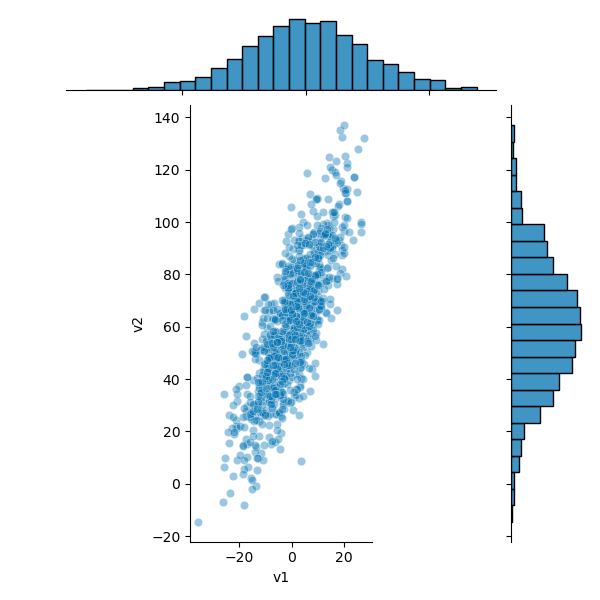

In [58]:
# Some of th eplotting functions in Seaborn return a matplotlib axis object. While others
# operate on an entire figure and produce plots with several panels, returning a Seaborn
# grid object

# In both cases, matplotlib can be used to further tweak the plots
grid = sns.jointplot(v1, v2, alpha = 0.4)
grid.ax_joint.set_aspect('equal')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


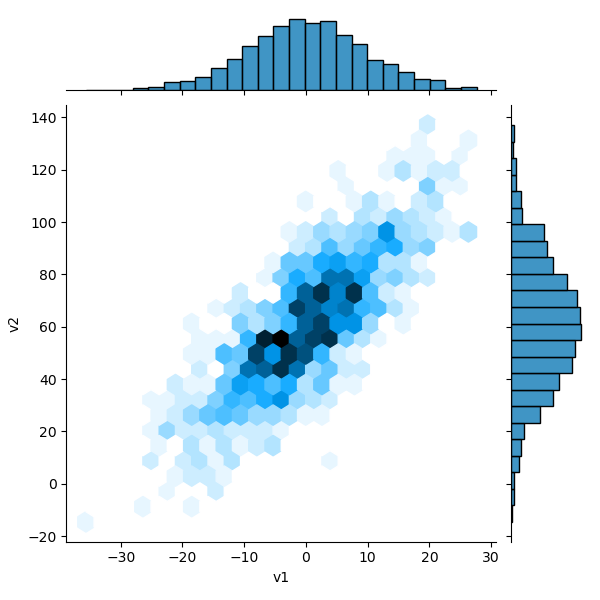

In [59]:
# Hexbin plots are the bivariate counterpart to histograms. Hexbin plots show the number
# of observations that fall within hexagonal bins.

# The hexbin style of plot works well with relatively large data sets.
sns.jointplot(v1, v2, kind = 'hex')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


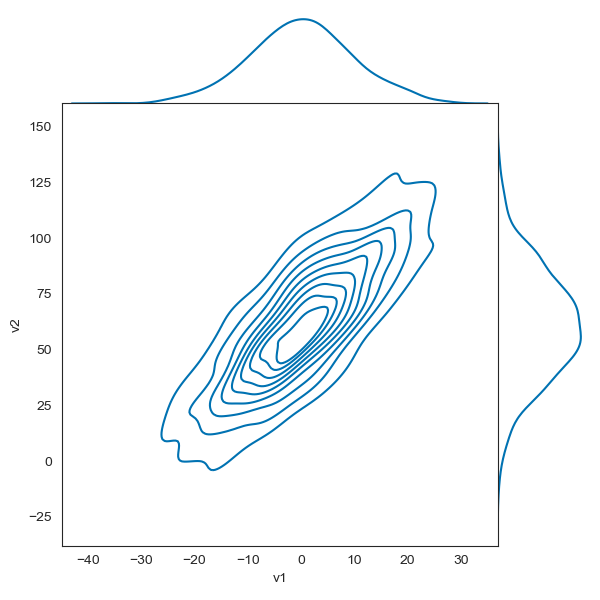

In [61]:
# Another good option for visualizing the distribution of data sets is kernel density
# estimations or KDE plots. We can think of two dimensional KDE plots as the continuous
# version of the hexbin jointplot

# We set the style
sns.set_style('white')

sns.jointplot(v1, v2, kind = 'kde', space = 0)

In [62]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


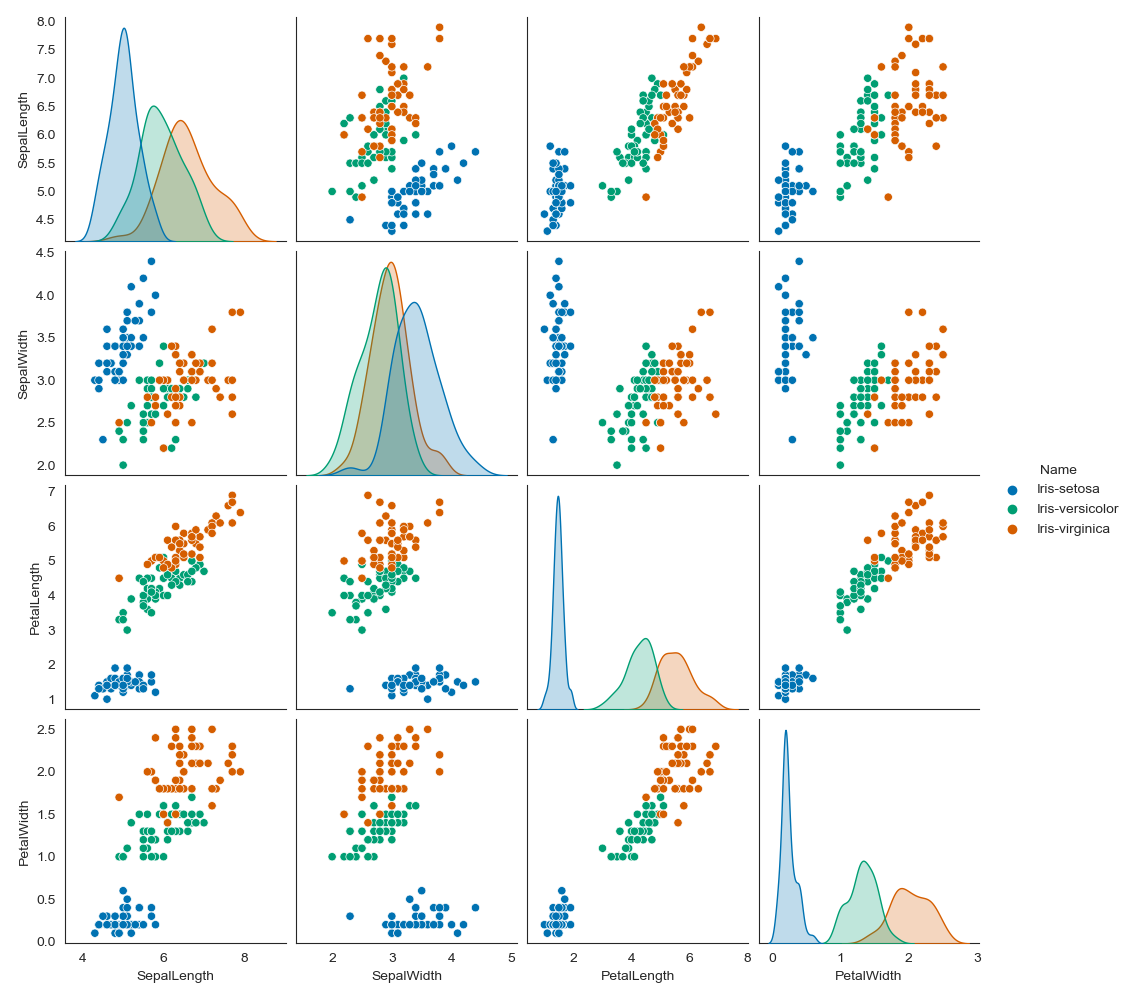

In [64]:
# Similar to pandas, Seaborn has a built in function that creates a scatterplot matrix

# We tell it to use a kde along the diagonals instead of the default histograms
sns.pairplot(iris, hue = 'Name', diag_kind = 'kde')

In [65]:
# Another type of plot: Violin plot

# It's kind of a scatter plot for categorical data

<IPython.core.display.Javascript object>


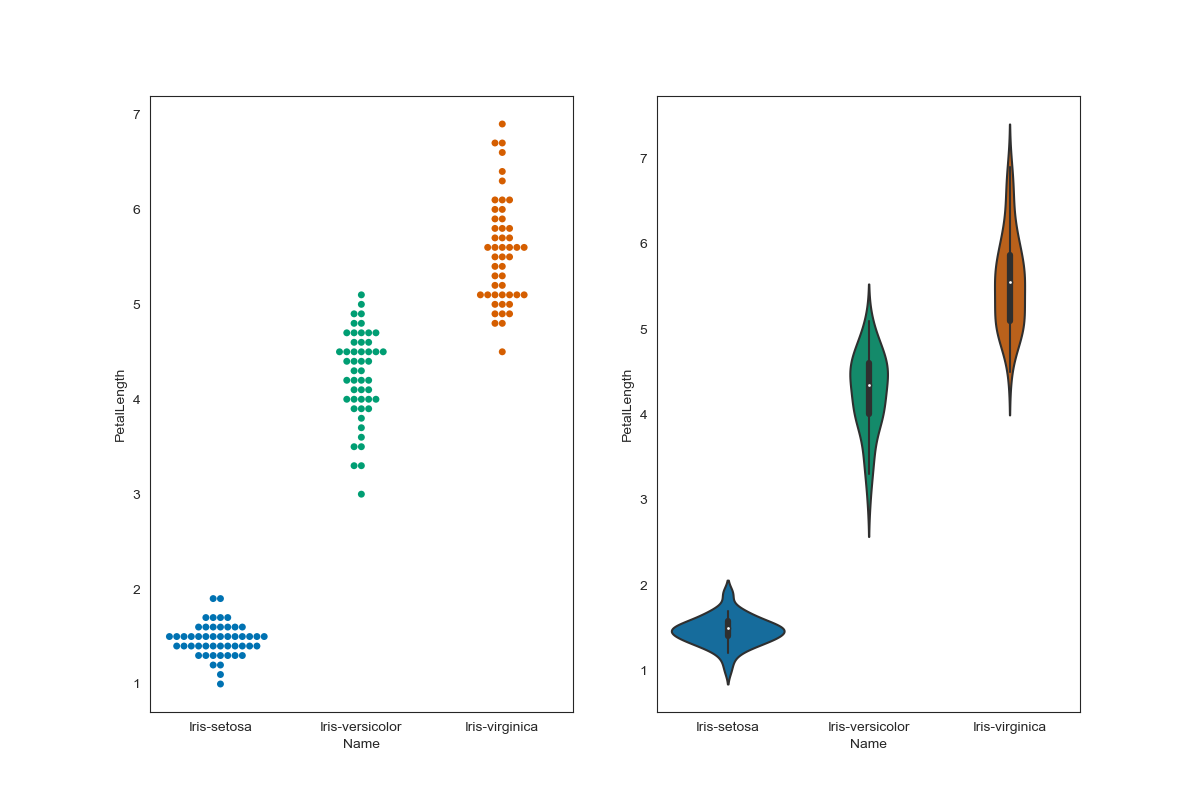

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Name', ylabel='PetalLength'>

In [66]:
plt.figure(figsize = (12, 8))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data = iris)
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data = iris)

In [67]:
# Looking at the swarmplot, each species has its own column and each observation's petal
# length is shown. With more common values appearing as the wide parts of the cluster, 
# much like a histogram

# The violinplot is like box plot with a rotated kernel density estimation on each side.

# Violin plots convey more information than box plots and are able to show particular
# phenomena within the distribution that box plots are unable to convey such as multi
# modality